In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing


In [2]:
df = pd.read_csv('/home/vikas/Downloads/price_pred/train_u6lujuX_CVtuZ9i .txt')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.drop(['Loan_ID'],axis=1, inplace= True)

In [9]:
df.Gender.value_counts(dropna= False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [10]:
df.groupby('Loan_Status')['Gender'].value_counts(dropna= False)

Loan_Status  Gender
N            Male      150
             Female     37
             NaN         5
Y            Male      339
             Female     75
             NaN         8
Name: Gender, dtype: int64

In [11]:
df.Loan_Status.value_counts(normalize= True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [12]:
df.groupby('Loan_Status')['Married'].value_counts(dropna= False)

Loan_Status  Married
N            Yes        113
             No          79
Y            Yes        285
             No         134
             NaN          3
Name: Married, dtype: int64

In [13]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(360, inplace=True)


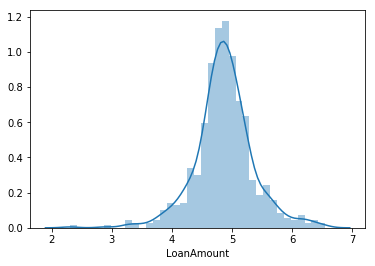

In [14]:
import seaborn as sns

df['LoanAmount']= np.log1p(df['LoanAmount'])
sns.distplot(df['LoanAmount'])

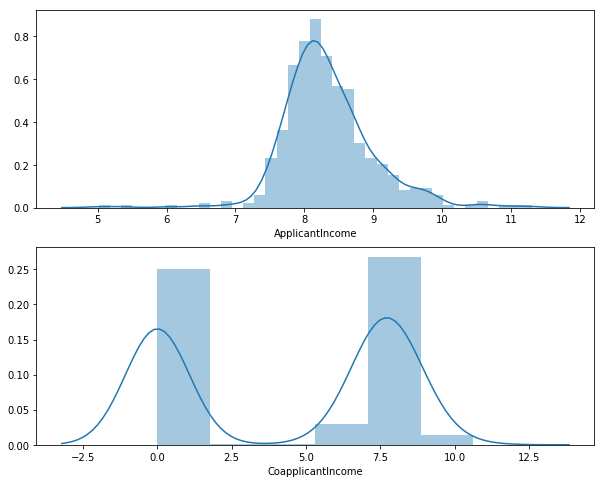

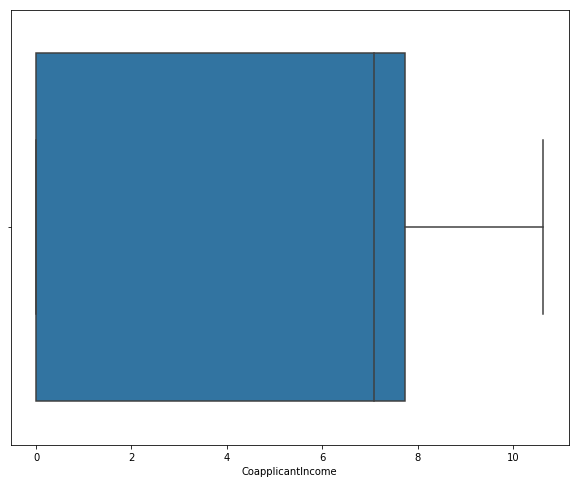

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10,8))

plt.subplot(2, 1, 1)
df['ApplicantIncome']= np.log1p(df['ApplicantIncome'])
ax1=sns.distplot(df['ApplicantIncome'])
plt.subplot(2, 1, 2)
df['CoapplicantIncome']= np.log1p(df['CoapplicantIncome'])

ax2=sns.distplot(df['CoapplicantIncome'])
plt.figure(figsize=(10,8))
sns.boxplot(df['CoapplicantIncome'])

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

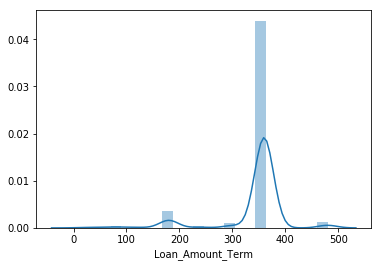

In [16]:
import seaborn as sns
sns.distplot(df['Loan_Amount_Term'])
df['Loan_Amount_Term'].value_counts()

In [17]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['ApplicantIncome','CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(df[['ApplicantIncome','CoapplicantIncome' ,'LoanAmount']])

In [19]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.581854,0.000000,0.633105,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,0.543052,0.688057,0.601711,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,0.475649,0.000000,0.447563,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,0.451844,0.730059,0.586647,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,0.585909,0.000000,0.624304,360.0,1.0,Urban,Y


In [20]:
from sklearn import preprocessing

In [21]:
le = preprocessing.LabelEncoder()

df1 = df[['Gender', 'Married','Dependents','Education','Self_Employed','Credit_History','Property_Area', 'Loan_Status']].apply(le.fit_transform)

In [22]:
df1=pd.get_dummies(data=df, columns=['Gender', 'Married','Dependents','Education','Self_Employed','Credit_History','Property_Area'])

In [23]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
df2 = pd.concat([df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']], df1], axis=1)

In [25]:
df2.shape

(614, 26)

In [26]:
df2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Credit_History_0.0', 'Credit_History_1.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [27]:
y= df2['Loan_Status']
df2.drop(['Loan_Status'],axis=1, inplace=True)


In [28]:
df2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.581854,0.000000,0.633105,360.0,0.581854,0.000000,0.633105,360.0,0,1,...,0,1,0,1,0,0,1,0,0,1
1,0.543052,0.688057,0.601711,360.0,0.543052,0.688057,0.601711,360.0,0,1,...,0,1,0,1,0,0,1,1,0,0
2,0.475649,0.000000,0.447563,360.0,0.475649,0.000000,0.447563,360.0,0,1,...,0,1,0,0,1,0,1,0,0,1
3,0.451844,0.730059,0.586647,360.0,0.451844,0.730059,0.586647,360.0,0,1,...,0,0,1,1,0,0,1,0,0,1
4,0.585909,0.000000,0.624304,360.0,0.585909,0.000000,0.624304,360.0,0,1,...,0,1,0,1,0,0,1,0,0,1


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [31]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
print(accuracy_score(y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.83
0.8292682926829268


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[14 19]
 [ 2 88]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.88      0.42      0.57        33
           Y       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [35]:
test= pd.read_csv('/home/vikas/Downloads/price_pred/test_Y3wMUE5_7gLdaTN.txt')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [36]:
test.shape

(367, 12)

In [ ]:
df4= pd.DataFrame()
df4['Loan_ID']= test['Loan_ID']
test['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
test['Married'].fillna(df['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
test['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
test['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
test['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
test['Loan_Amount_Term'].fillna(360, inplace=True)

test['LoanAmount']= np.log1p(df['LoanAmount'])
test['ApplicantIncome']= np.log1p(df['ApplicantIncome'])
test['CoapplicantIncome']= np.log1p(df['CoapplicantIncome'])

df2=pd.get_dummies(data=test, columns=['Gender', 'Married','Dependents','Education','Self_Employed','Credit_History','Property_Area'])
df2.drop(['Loan_ID'],axis=1, inplace=True)

In [ ]:
df2.shape

In [ ]:
df4['Loan_Status'] = logreg.predict(df2)
#df4['Loan_Status'] = df4['Loan_Status'] .apply(lambda x: 0 if x is 'Y' else 1)

In [ ]:
df4.head()

In [ ]:
df4.shape

In [ ]:
df4.to_csv('./result.csv',index=False)

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
print(accuracy_score(y_test,y_pred))

0.7886178861788617


In [39]:
df4

NameError: name 'df4' is not defined

In [40]:
featimp = pd.Series(clf.feature_importances_, index=df2.columns).sort_values(ascending=False)
print (featimp)


Credit_History_1.0         0.178879
ApplicantIncome            0.112994
LoanAmount                 0.100600
LoanAmount                 0.093545
ApplicantIncome            0.091966
Credit_History_0.0         0.080170
CoapplicantIncome          0.067549
CoapplicantIncome          0.055679
Loan_Amount_Term           0.024655
Property_Area_Rural        0.023324
Dependents_0               0.021393
Property_Area_Semiurban    0.015210
Education_Not Graduate     0.015152
Married_No                 0.013262
Dependents_2               0.012371
Loan_Amount_Term           0.011271
Dependents_3+              0.010128
Self_Employed_Yes          0.010064
Property_Area_Urban        0.010028
Dependents_1               0.009697
Gender_Female              0.009632
Married_Yes                0.009013
Gender_Male                0.008630
Education_Graduate         0.007945
Self_Employed_No           0.006843
dtype: float64
